# Task: Analyzing the Performance of Teams in the FIFA World Cup.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
data = pd.read_csv('fifa_eda.csv')

In [3]:
data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [4]:
data.shape

(18207, 18)

In [5]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [6]:
data.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.0


In [7]:
data.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [8]:
data.index

RangeIndex(start=0, stop=18207, step=1)

In [9]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [10]:
data.isnull()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [12]:
data.count()

ID                          18207
Name                        18207
Age                         18207
Nationality                 18207
Overall                     18207
Potential                   18207
Club                        17966
Value                       17955
Wage                        18207
Preferred Foot              18207
International Reputation    18159
Skill Moves                 18159
Position                    18207
Joined                      18207
Contract Valid Until        17918
Height                      18207
Weight                      18207
Release Clause              18207
dtype: int64

In [13]:
data['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [14]:
data['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [15]:
data.nunique()

ID                          18207
Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          651
Value                         216
Wage                          144
Preferred Foot                  2
International Reputation        5
Skill Moves                     5
Position                       27
Joined                         22
Contract Valid Until           35
Height                         22
Weight                         58
Release Clause               1245
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

# Q) 1. Top 5 countires with highest number of football players?

In [17]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [18]:
# syntax
# df['column_name'].value_counts()

In [19]:
data['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [20]:
# if you need top five than use head() on it

data['Nationality'].value_counts().head()

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

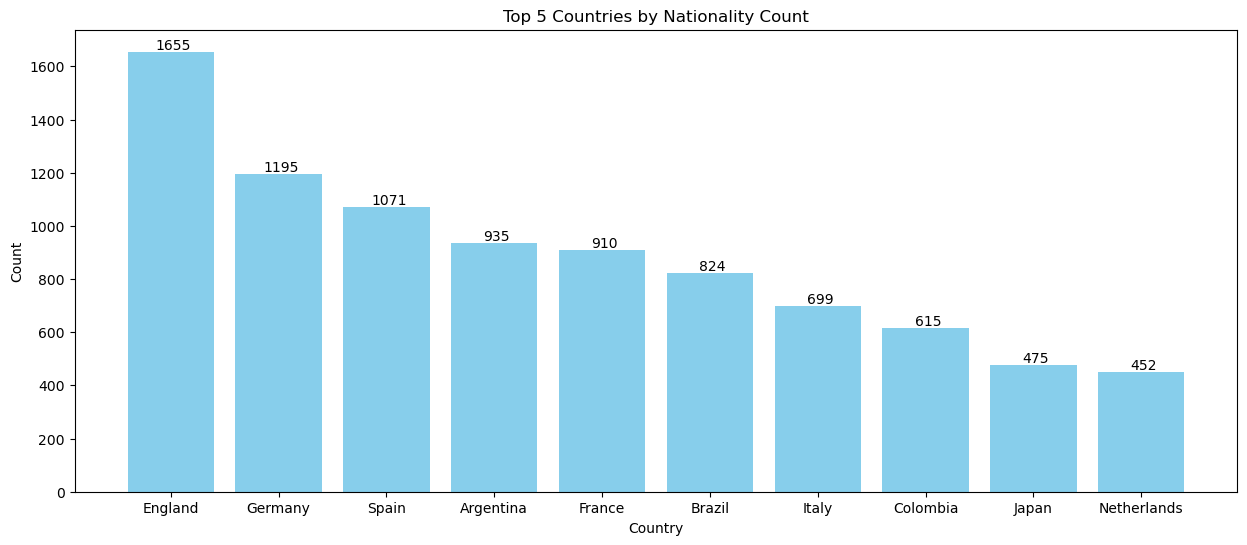

In [135]:
top_5_countries = data['Nationality'].value_counts().head(10)

countries = top_5_countries.index
counts = top_5_countries.values

# I am Creating a bar plot
plt.figure(figsize=(15, 6))
bars = plt.bar(countries, counts, color='skyblue')
plt.bar(countries, counts, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 5 Countries by Nationality Count')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/1.4 - 0.15, bar.get_height() + 10, str(count), ha='center', fontsize=10)

plt.show()

#### Top 10 countires with highest number of football players .
# 
# 

# Q) 2. Top 10 oldest players and top 10 youngest players?

In [21]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [94]:
# Top 5 oldest players
data.sort_values(by = 'Age', ascending=False).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
4741,140029,O. Pérez,45,Mexico,71,71,Pachuca,160.0,8.0,Right,2.0,1.0,GK,1991,2021-01-01,5.666667,165.0,272.0
10545,140183,S. Narazaki,42,Japan,65,65,Nagoya Grampus,40.0,1.0,Right,2.0,1.0,GK,1999,2021-01-01,6.166667,176.0,50.0
7225,142998,C. Muñoz,41,Argentina,68,68,CD Universidad de Concepción,60.0,1.0,Right,1.0,1.0,GK,2013,2018-01-01,5.833333,161.0,84.0
15426,18745,M. Tyler,41,England,59,59,Peterborough United,10.0,1.0,Right,1.0,1.0,GK,2016,2019-01-01,6.000000,183.0,18.0
4187,156483,C. Lucchetti,40,Argentina,71,71,Atlético Tucumán,160.0,4.0,Right,1.0,1.0,GK,2012,2019-01-01,6.000000,152.0,240.0
16596,219344,A. Al Basisi,40,Saudi Arabia,57,57,Ohod Club,10.0,1.0,Right,1.0,1.0,GK,2014,2019-01-01,6.000000,190.0,17.0
2821,232543,S. Bertoli,40,Argentina,73,73,Patronato,270.0,6.0,Right,1.0,1.0,GK,2003,2019-01-01,6.083333,179.0,392.0
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77.0,Right,4.0,1.0,GK,2018,2019-01-01,6.333333,203.0,7400.0
16264,28157,P. van der Vlag,40,Netherlands,58,58,FC Emmen,10.0,1.0,Right,1.0,1.0,GK,2017,2019-01-01,6.083333,168.0,15.0
9484,176540,B. Castillo,40,Colombia,66,66,Atlético Huila,40.0,1.0,Right,1.0,1.0,GK,2017,2021-01-01,6.083333,190.0,54.0


In [23]:
# top 10 youngest players
data.sort_values(by = 'Age', ascending=True).head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.0
17743,244752,J. Olstad,16,Norway,52,69,Sarpsborg 08 FF,100.0,1.0,Right,1.0,2.0,ST,2017,2019-01-01,5.666667,150.0,188.0
13293,246594,H. Massengo,16,France,62,75,AS Monaco,450.0,2.0,Right,1.0,2.0,CDM,2018,2021-01-01,5.833333,146.0,1100.0
16081,241552,J. Italiano,16,Australia,58,79,Perth Glory,280.0,1.0,Right,1.0,3.0,LM,2017,2019-01-01,5.583333,143.0,630.0
18166,243621,N. Ayéva,16,Sweden,48,72,Örebro SK,70.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,5.833333,154.0,158.0
17712,245470,K. Broda,16,Poland,53,74,Wisła Kraków,110.0,1.0,Right,1.0,1.0,GK,2017,2021-01-01,6.250000,187.0,259.0
17354,242240,L. D'Arrigo,16,Australia,54,71,Adelaide United,130.0,1.0,Right,1.0,2.0,CAM,2018,2019-01-01,5.750000,154.0,244.0
13567,246419,Y. Verschaeren,16,Belgium,62,83,RSC Anderlecht,650.0,1.0,Right,1.0,3.0,CAM,2017,2021-01-01,5.666667,139.0,1600.0
16927,243646,B. Nygren,16,Sweden,56,73,IFK Göteborg,180.0,1.0,Left,1.0,2.0,ST,2018,2020-01-01,6.000000,161.0,338.0
18018,243722,B. O'Gorman,16,Republic of Ireland,50,69,Bray Wanderers,60.0,1.0,Right,1.0,2.0,RM,2018,2018-01-01,5.750000,161.0,131.0


In [83]:
Top_10_oldest = data.sort_values(by = 'Age', ascending=False).head(10)
Top_10_youngest = data.sort_values(by = 'Age', ascending=True).head(10)

### Create DataFrames

In [109]:
df_top_10_youngest = pd.DataFrame(Top_10_youngest)
df_top_10_oldest = pd.DataFrame(Top_10_oldest)

### Create a figure and axis

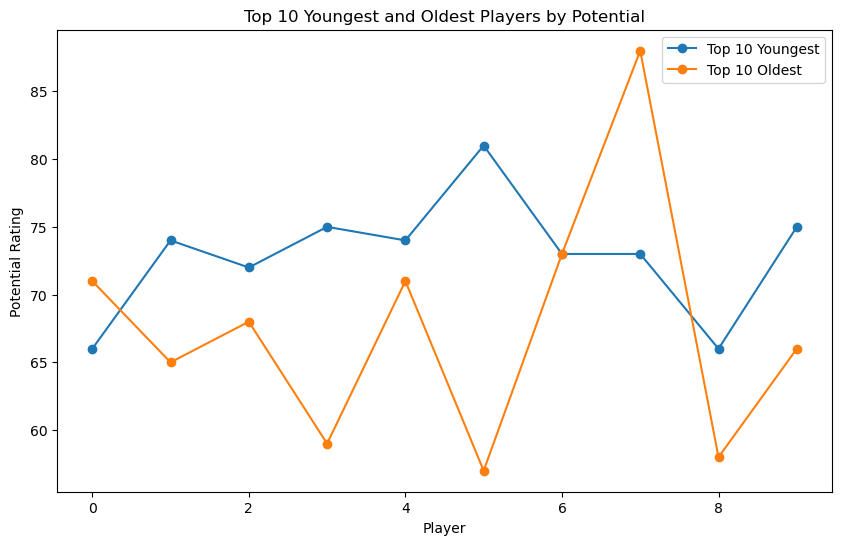

In [113]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(Top_10_youngest))


ax.plot(x, df_top_10_youngest['Potential'], marker='o', label='Top 10 Youngest')
ax.plot(x, df_top_10_oldest['Potential'], marker='o', label='Top 10 Oldest')

ax.set_xlabel('Player')
ax.set_ylabel('Potential Rating')
ax.set_title('Top 10 Youngest and Oldest Players by Potential')
ax.legend()

plt.show()

#### The conclusion is that the top 10 youngest players have, on average, better potential ratings than the top 10 oldest players.

# 

#  

# Q) 3. Which player plays for highest club ?

In [24]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [25]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [26]:
data['Name'].value_counts()

J. Rodríguez    11
Paulinho         8
R. Williams      7
J. Williams      7
J. Gómez         6
                ..
I. Anya          1
P. Hoban         1
Hugo Basto       1
Kanu             1
G. Nugent        1
Name: Name, Length: 17194, dtype: int64

In [27]:
sorted_data = data.sort_values('Club', ascending=False)

In [28]:
highest_club_player = sorted_data.iloc[0]
highest_club_player['Name']

'M. Chrapek'

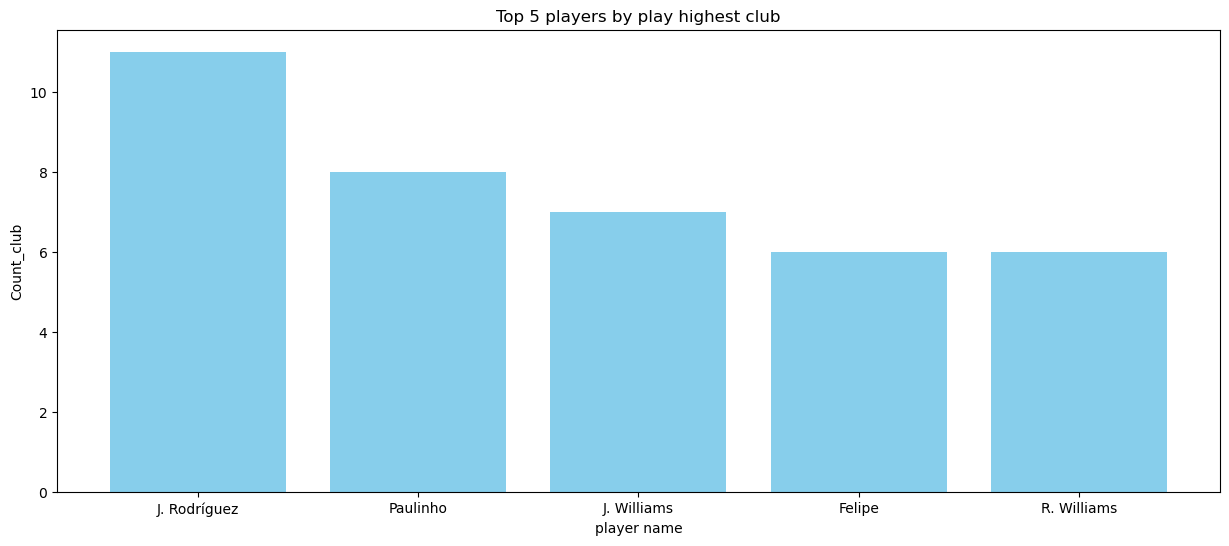

In [150]:
top_5_highest_club_player = data['Name'].value_counts().head(5)

players = top_5_highest_club_player.index
count_club = top_5_highest_club_player.values


plt.figure(figsize=(15, 6))
plt.bar(players, count_club, color='skyblue')
plt.xlabel('player name')
plt.ylabel('Count_club')
plt.title('Top 5 players by play highest club')

plt.show()

#### Top 5 players who played highest club.
# 
# 

# Q) 4. Clubs with highest number of player ?

In [29]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [30]:
data.Club.value_counts().head()

FC Barcelona          33
Valencia CF           33
Fortuna Düsseldorf    33
Cardiff City          33
Rayo Vallecano        33
Name: Club, dtype: int64

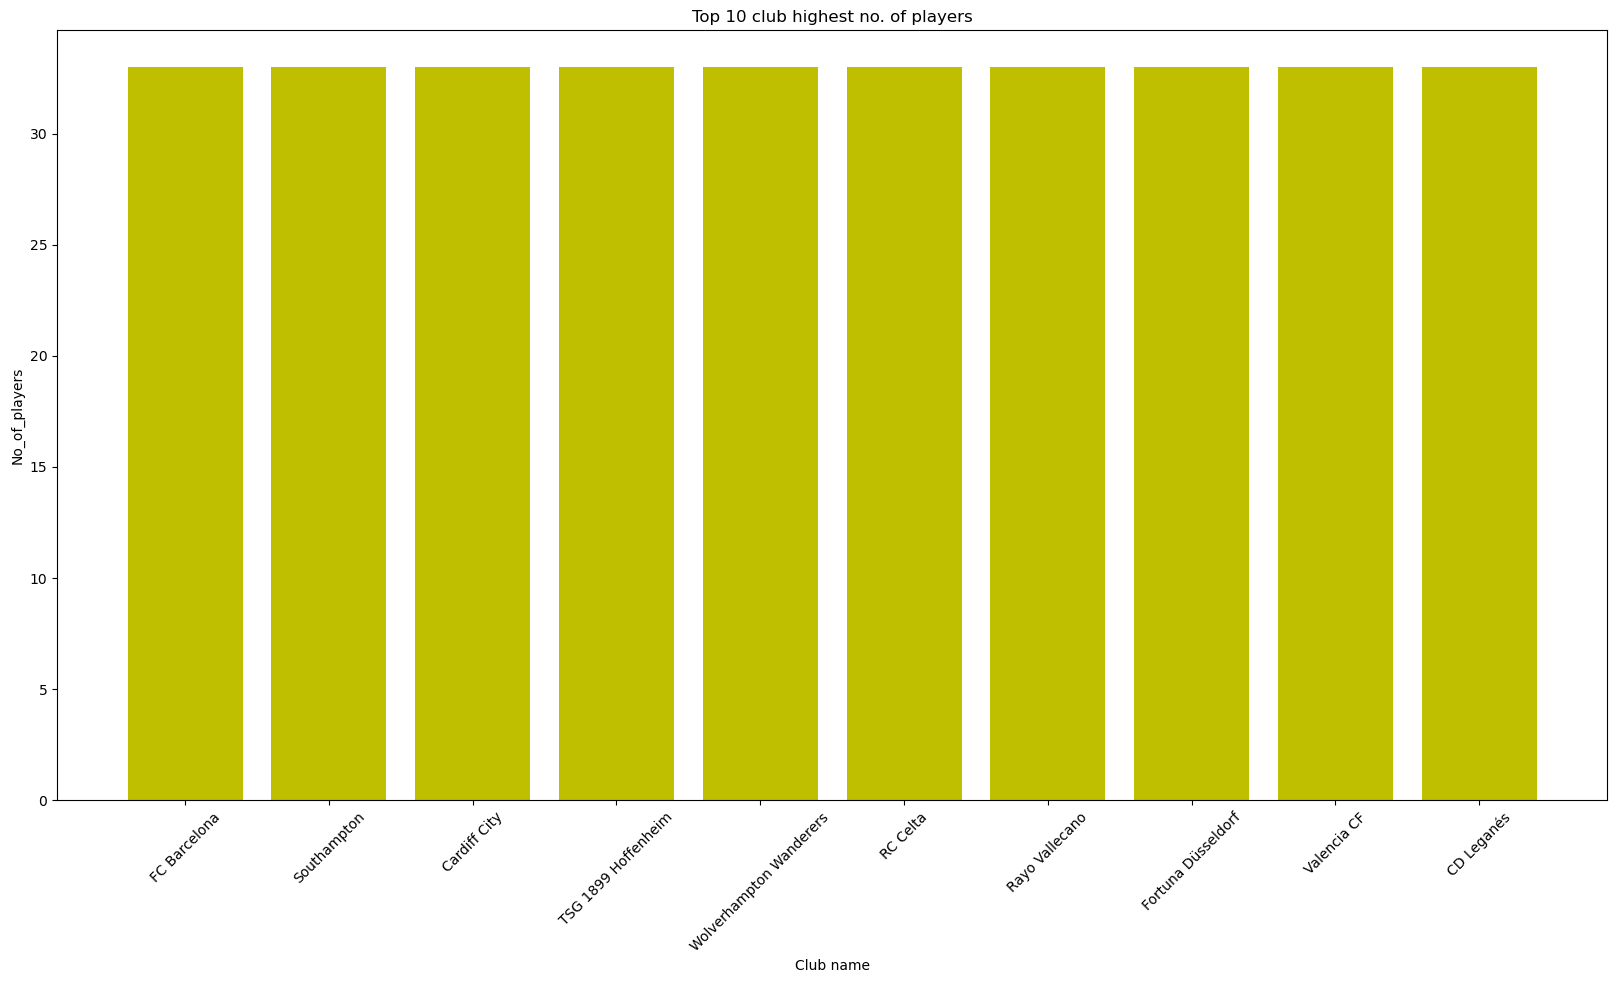

In [162]:
top_10_highest_player_in_club = data.Club.value_counts().head(10)

club = top_10_highest_player_in_club.index
No_of_players = top_10_highest_player_in_club.values


plt.figure(figsize=(20,10))
plt.bar(club,No_of_players, color='y')
plt.xlabel('Club name')
plt.ylabel('No_of_players')
plt.title('Top 10 club highest no. of players')
plt.xticks(rotation=45) 

plt.show()

#### the reasion of the same graph is top 10 Clubs with highest number of player has same no. of players 33.
# 
# 

# Q) 5. Clubs with lowest number of player ?

In [31]:
data.Club.value_counts(ascending=True).head(1)

Derry City    18
Name: Club, dtype: int64

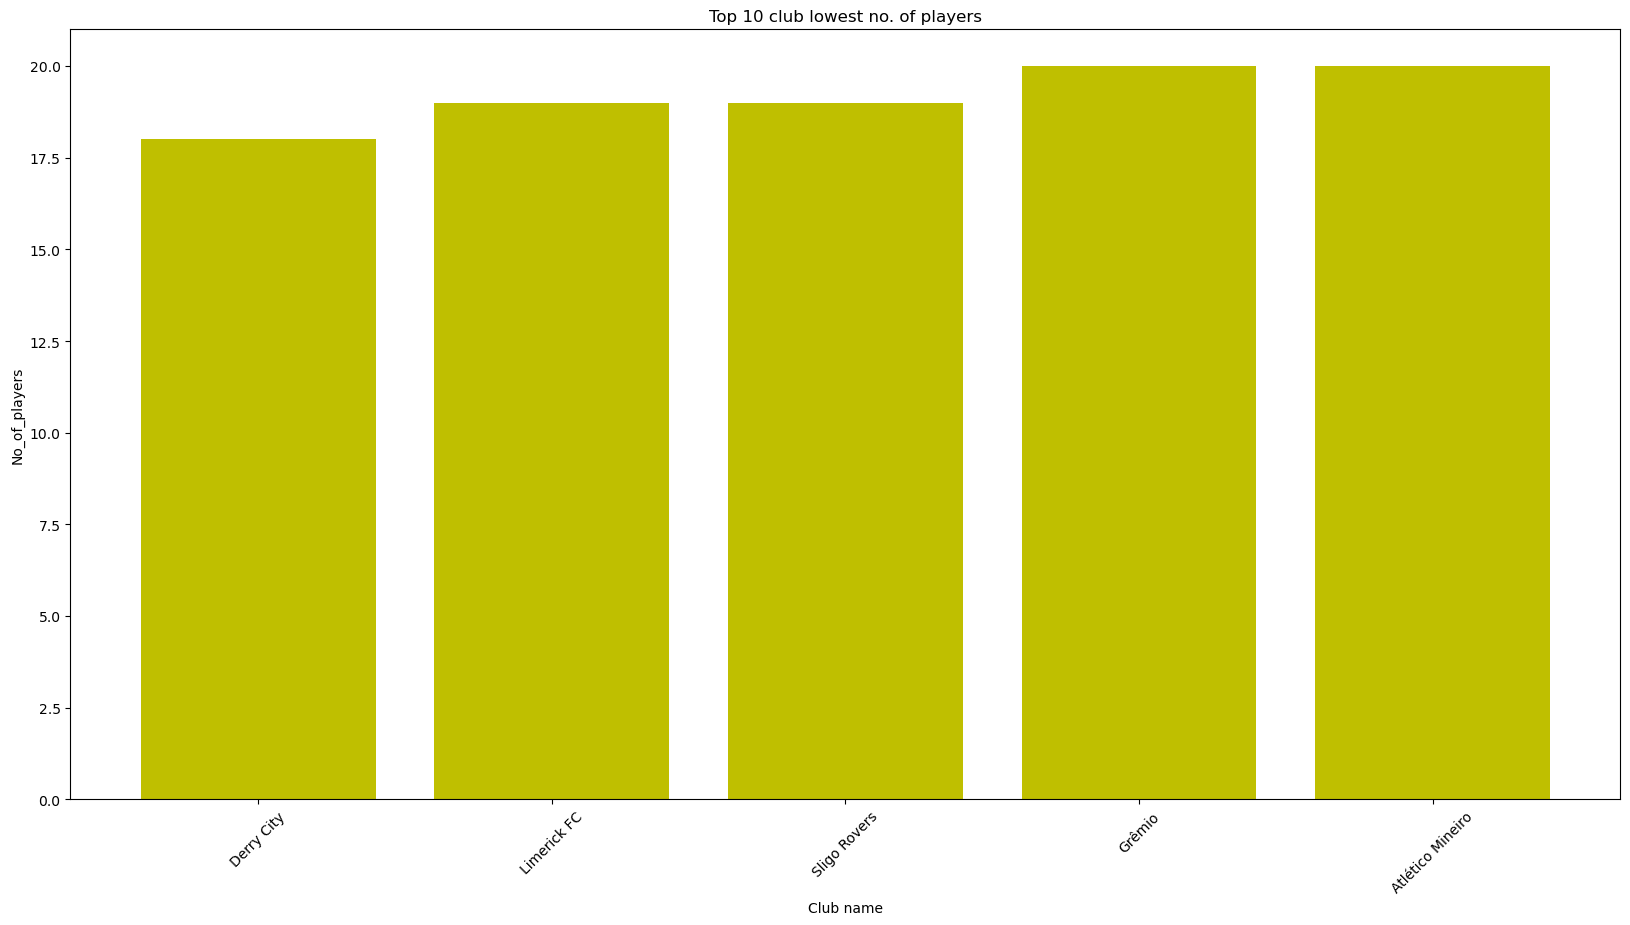

In [164]:
top_5_lowest_player_in_club = data.Club.value_counts(ascending=True).head(5)

club = top_5_lowest_player_in_club.index
No_of_players = top_5_lowest_player_in_club.values


plt.figure(figsize=(20,10))
plt.bar(club,No_of_players, color='y')
plt.xlabel('Club name')
plt.ylabel('No_of_players')
plt.title('Top 10 club lowest no. of players')
plt.xticks(rotation=45) 

plt.show()

# Q) 6. Clubs with youngest/oldest numbers of players ?

In [32]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [33]:
# Clubs oldest numbers of players

data.groupby('Club')['Age'].max().sort_values()

Club
Barnsley                  25
FC Nordsjælland           27
Fortuna Sittard           28
Godoy Cruz                28
FC Sochaux-Montbéliard    28
                          ..
Ohod Club                 41
Nagoya Grampus            42
Cambridge United          44
Accrington Stanley        44
Pachuca                   45
Name: Age, Length: 651, dtype: int64

In [34]:
# Clubs youngest numbers of players

data.groupby('Club')['Age'].min().sort_values()

Club
Śląsk Wrocław             16
Real Sporting de Gijón    16
Stevenage                 16
Vejle Boldklub            16
Shrewsbury                16
                          ..
Atlético Mineiro          26
Atlético Paranaense       26
Bahia                     26
Fluminense                26
Grêmio                    26
Name: Age, Length: 651, dtype: int64

# Q) 7. Players with highest/lowest wage ?

In [35]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [36]:
# Players with highest Wage 

data.groupby('Name')['Wage'].max().sort_values(ascending=False).head()

Name
L. Messi             565.0
L. Suárez            455.0
L. Modrić            420.0
Cristiano Ronaldo    405.0
Sergio Ramos         380.0
Name: Wage, dtype: float64

In [37]:
# Players with lowest Wage

data.groupby('Name')['Wage'].max().sort_values(ascending=True).head()

Name
L. Justiniano     0.0
M. Borjan         0.0
B. Dzsudzsák      0.0
C. Cueva          0.0
B. Sigurðarson    0.0
Name: Wage, dtype: float64

# Q) 8. Which club has highest/lowest average wage ?

In [38]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [39]:
# club has highest average wage

data.groupby('Club')['Wage'].mean().sort_values(ascending=False).head()

Club
Real Madrid          152.030303
FC Barcelona         146.575758
Juventus             131.680000
Manchester City      113.363636
Manchester United    102.757576
Name: Wage, dtype: float64

In [40]:
# club has lowest average wage

data.groupby('Club')['Wage'].mean().sort_values(ascending=True).head()

Club
Shamrock Rovers           1.0
St. Patrick's Athletic    1.0
HJK Helsinki              1.0
Spartak Moscow            1.0
Sparta Praha              1.0
Name: Wage, dtype: float64

# Q) 9. Which team has left Preferred Foot/right ?

In [41]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [42]:
# team has left Preferred Foot 

data[data['Preferred Foot'] == 'Left']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000.0,285.0,Left,4.0,4.0,LCM,2010,2020-01-01,5.666667,148.0,111000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000.0,205.0,Left,3.0,4.0,LF,2015,2022-01-01,5.833333,165.0,153500.0
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000.0,145.0,Left,4.0,4.0,CAM,2014,2023-01-01,5.750000,161.0,165800.0
19,192119,T. Courtois,26,Belgium,89,90,Real Madrid,53500.0,240.0,Left,4.0,1.0,GK,2018,2024-01-01,6.500000,212.0,113700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18172,243636,C. Hawkins,18,England,48,65,Burton Albion,50.0,1.0,Left,1.0,1.0,GK,2018,2019-01-01,6.166667,165.0,119.0
18175,243649,E. Clarke,19,England,48,59,Fleetwood Town,40.0,1.0,Left,1.0,2.0,LB,2018,2019-01-01,5.666667,154.0,78.0
18191,245570,J. Norville-Williams,18,England,47,65,Cambridge United,50.0,1.0,Left,1.0,2.0,LB,2018,2021-01-01,5.916667,168.0,119.0
18200,231381,J. Young,18,Scotland,47,62,Swindon Town,60.0,1.0,Left,1.0,2.0,ST,2015,2019-01-01,5.750000,157.0,143.0


In [43]:
# team has Right Preferred Foot 

data[data['Preferred Foot'] == 'Right']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000.0,340.0,Right,4.0,4.0,LF,2012,2020-01-01,5.666667,163.0,172100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


# Q) 10. Which player has big / short height ? 

In [44]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [45]:
# player has big Height

data.groupby('Name')['Height'].max().sort_values(ascending = False).head()

Name
T. Holý        6.750000
D. Hodzic      6.750000
M. Casey       6.666667
K. Scherpen    6.666667
A. Chapman     6.666667
Name: Height, dtype: float64

In [46]:
# player has short Height

data.groupby('Name')['Height'].max().sort_values(ascending = True).head()

Name
H. Nakagawa      5.083333
N. Barrios       5.083333
C. Songkrasin    5.166667
C. Techera       5.166667
Élton            5.166667
Name: Height, dtype: float64

# Q) 11. Which player has more weight ?

In [47]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [48]:
# first find average weight of the each index than find that weight and compair it if he get negative value than he need 
# some weight and if he get positive weight than he need to loose his weight

(data['Weight']-(data['Weight'].mean())).sort_values()

13338   -55.979129
17157   -55.979129
4390    -50.979129
16420   -48.979129
17501   -48.979129
           ...    
8908     63.020871
15179    68.020871
8652     70.020871
13520    70.020871
9501     77.020871
Name: Weight, Length: 18207, dtype: float64

In [49]:
# find the largest weight of the dataframe

data.nlargest(5, 'Weight')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
9501,156321,A. Akinfenwa,36,England,66,66,Wycombe Wanderers,230.0,2.0,Right,1.0,2.0,LS,2016,2019-01-01,5.833333,243.0,403.0
8652,179685,C. Seitz,31,United States,67,67,Houston Dynamo,475.0,2.0,Right,1.0,1.0,GK,2018,2021-01-01,6.250000,236.0,713.0
13520,239746,L. Watkowiak,22,Germany,62,68,SV Wehen Wiesbaden,300.0,1.0,Right,1.0,1.0,GK,2017,2019-01-01,6.500000,236.0,495.0
15179,211415,M. Rhead,34,England,60,60,Lincoln City,110.0,3.0,Right,1.0,2.0,ST,2015,2019-01-01,6.333333,234.0,193.0
8908,195357,F. Farnolle,33,Benin,66,66,Yeni Malatyaspor,325.0,3.0,Right,1.0,1.0,GK,2017,2019-01-01,6.416667,229.0,650.0


# Q) 12. Which player has high International Reputation ?

In [50]:
data.groupby('Name')['International Reputation'].max().sort_values()

Name
A. Abang            1.0
M. Mosquera         1.0
M. Mostefa          1.0
M. Moström          1.0
M. Mouandilmadji    1.0
                   ... 
R. Minor            NaN
S. Bauer            NaN
S. Rivera           NaN
Vinicius            NaN
Y. Ammour           NaN
Name: International Reputation, Length: 17194, dtype: float64

### ----------- first we have to remove null values to find answer of this question ----------

In [51]:
data.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [52]:
data.shape

(18207, 18)

In [53]:
data.dropna(inplace=True)

In [54]:
data.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [55]:
data.shape

(17907, 18)

### -------------- All right our all null value are removed --------------

In [56]:
# player has low International Reputation

data.groupby('Name')['International Reputation'].max().sort_values(ascending=True).head()

Name
A. Abang       1.0
M. Mudryk      1.0
M. Muheim      1.0
M. Multhaup    1.0
M. Munetsi     1.0
Name: International Reputation, dtype: float64

In [57]:
# player has high International Reputation 

data.groupby('Name')['International Reputation'].max().sort_values(ascending=False).head()

Name
Neymar Jr            5.0
Z. Ibrahimović       5.0
M. Neuer             5.0
Cristiano Ronaldo    5.0
L. Messi             5.0
Name: International Reputation, dtype: float64

# Q) 13. Most famous Position ?

In [58]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [59]:
data['Position'].value_counts()

ST     2130
GK     1989
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
RCB     652
LCB     635
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [60]:
# Most famous Position

data['Position'].value_counts().index[0]

'ST'

# Q) 14. Which player/club has most skill moves ?

In [61]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [62]:
# club has most skill moves

data.groupby('Club')['Skill Moves'].max().sort_values(ascending=False).head()

Club
Feyenoord        5.0
Al Qadisiyah     5.0
Ajax             5.0
Club Necaxa      5.0
Hallescher FC    5.0
Name: Skill Moves, dtype: float64

In [63]:
# player has most skill moves

data.groupby('Name')['Skill Moves'].max().sort_values(ascending=False).head()

Name
B. Manu          5.0
C. Villanueva    5.0
J. Corona        5.0
M. Ødegaard      5.0
Y. Bolasie       5.0
Name: Skill Moves, dtype: float64

# Q) 15. Which position has International Reputation Skill Moves more Position ?

In [64]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [65]:
# the question does not tell which position he want max , min or mean so give them all

data.groupby('Position')['International Reputation','Skill Moves'].max()

C:\Users\hpw\AppData\Local\Temp\ipykernel_8612\3390901824.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Position')['International Reputation','Skill Moves'].max()


,International Reputation,Skill Moves
Position,,
CAM,4.0,5.0
CB,4.0,3.0
CDM,4.0,4.0
CF,3.0,4.0
CM,4.0,5.0
GK,5.0,1.0
LAM,4.0,4.0
LB,4.0,5.0
LCB,4.0,3.0


In [66]:
data.groupby('Position')['International Reputation','Skill Moves'].min()

C:\Users\hpw\AppData\Local\Temp\ipykernel_8612\2027835395.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Position')['International Reputation','Skill Moves'].min()


,International Reputation,Skill Moves
Position,,
CAM,1.0,2.0
CB,1.0,2.0
CDM,1.0,2.0
CF,1.0,2.0
CM,1.0,2.0
GK,1.0,1.0
LAM,1.0,2.0
LB,1.0,2.0
LCB,1.0,2.0


In [67]:
data.groupby('Position')['International Reputation','Skill Moves'].mean()

C:\Users\hpw\AppData\Local\Temp\ipykernel_8612\2400597370.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Position')['International Reputation','Skill Moves'].mean()


,International Reputation,Skill Moves
Position,,
CAM,1.133192,2.965116
CB,1.082810,2.017133
CDM,1.125000,2.324786
CF,1.189189,2.932432
CM,1.086420,2.534495
GK,1.097034,1.000000
LAM,1.238095,3.333333
LB,1.081288,2.423313
LCB,1.151181,2.047244
